**HTML tag to bold markdown cells**

In [1]:
%%html
<style>
    .jp-Notebook-cell{
        max-width : 100%;
        margin : 0;
        
        
    }
</style>

<style>
    .jp-RenderedMarkdown{
            font-weight: Bold;
            
    }
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [3]:
import os
print(os.getcwd())

/Users/mymac/Desktop/All files Here/DS600_asssignment


In [4]:
df = pd.read_csv('dataset/diabetes.csv')

In [5]:
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can see some zeros in the minimum sections in some columns like ['Glucose','BloodPressure','SkinThickness','Insulin']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [9]:
features= df.columns[:-1]

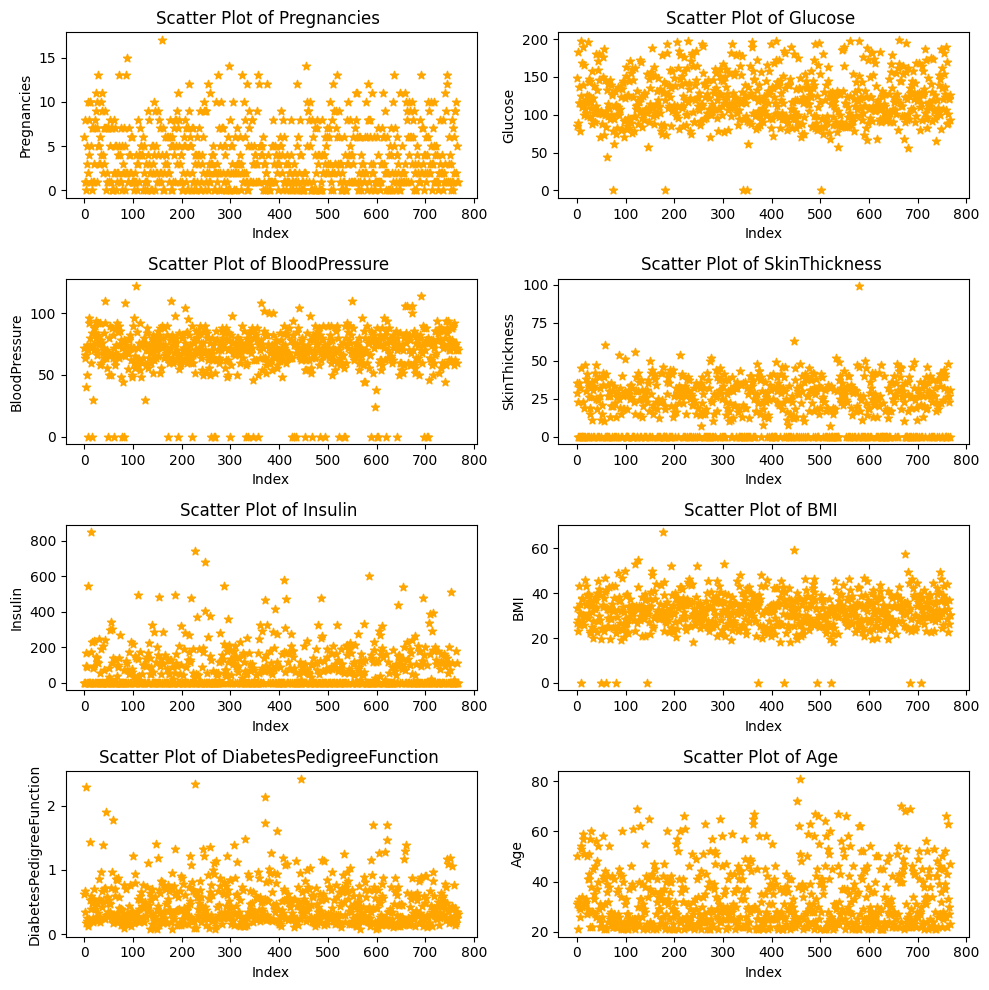

In [10]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(features):
    plt.subplot(4,2,i+1)
    
    plt.scatter(df.index, df[feature], color='orange', alpha=1,marker='*')
    plt.title(f'Scatter Plot of {feature} ')
    plt.xlabel('Index')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Box of each feature to find some outliers


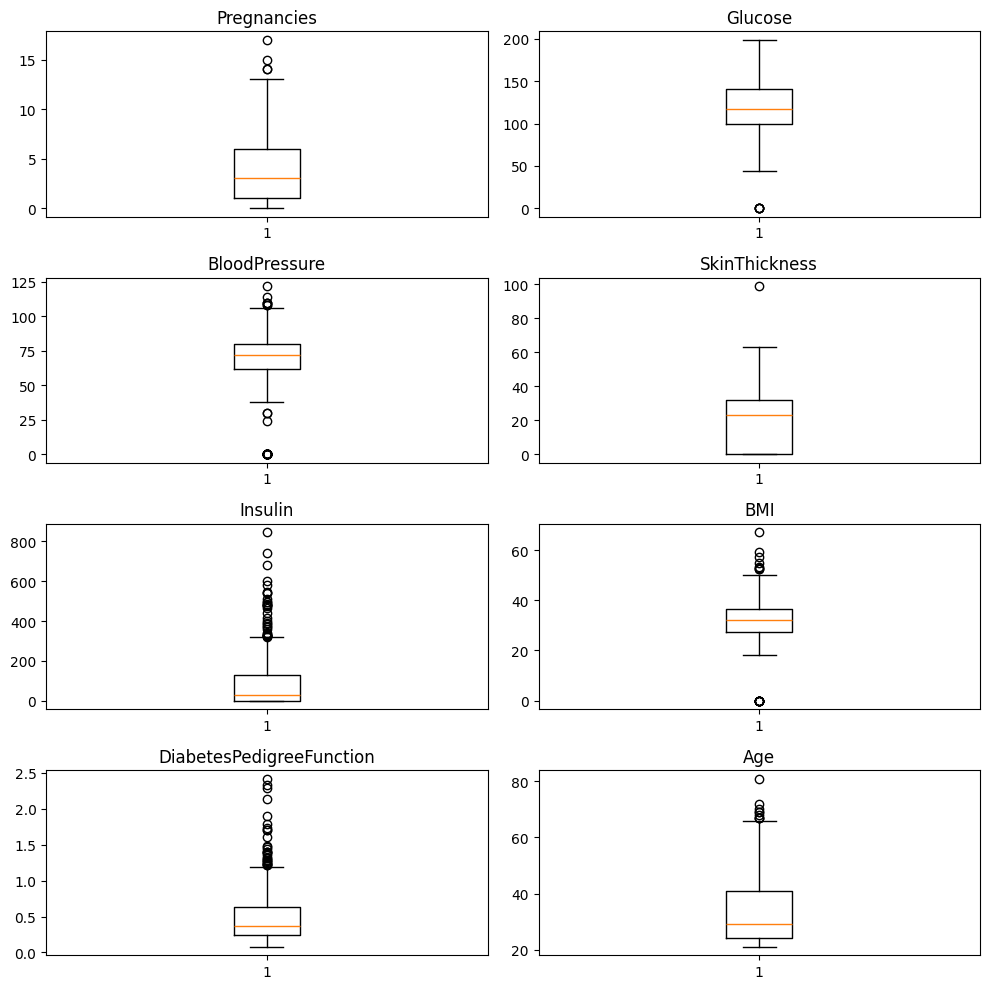

In [11]:
print("Box of each feature to find some outliers")
plt.figure(figsize=(10,10))
for i, feature in enumerate(features):
    plt.subplot(4,2,i+1)
    
    plt.boxplot( df[feature])
    plt.title(feature)
    # plt.xlabel('Index')
    # plt.ylabel(feature)
plt.tight_layout()
plt.show()

some outliers can be seen in each column

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot(data=df, x='Outcome')
# plt.title('Class Distribution')
# plt.show()

In [13]:
# numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# for col in numerical_cols:
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'{col} Distribution')
#     plt.subplot(1, 2, 2)
#     sns.boxplot(data=df, x=col)
#     plt.title(f'{col} Boxplot')
#     plt.show()

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


training the dataset as it is

In [16]:
df_beforeCleaning= df.copy()

In [17]:
X= df_beforeCleaning.drop("Outcome",axis=1)
y= df_beforeCleaning.Outcome

Train_test_split

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

fitting into model


In [19]:
logReg_model= LogisticRegression()
logReg_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.7467532467532467


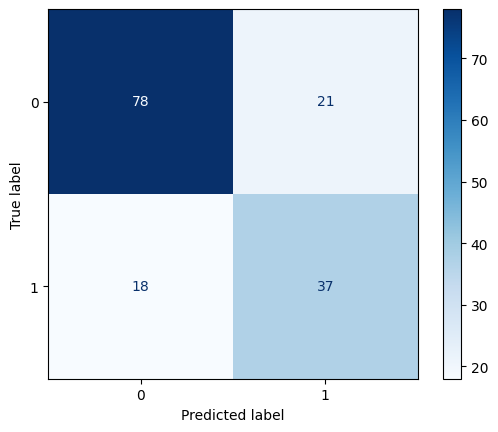

In [20]:
y_pred= logReg_model.predict(X_test)

# confusion matrix
cm= confusion_matrix(y_test,y_pred )
disp= ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')

# accuracy
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)


EDA

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


since min values of glucose, blood pressure, skin thickness,insulin level and BMI is shown "0", it can be concluded that some values in the dataset are supposed to be missing.
Hence, we replace the missing values with the avg value.

In [22]:
df_copy = df.copy(deep= True)

In [23]:
df_copy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data frame coppied

In [24]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [25]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df_copy['Outcome'].sum()

np.int64(268)

In [28]:
columns= df_copy.columns[:-1]

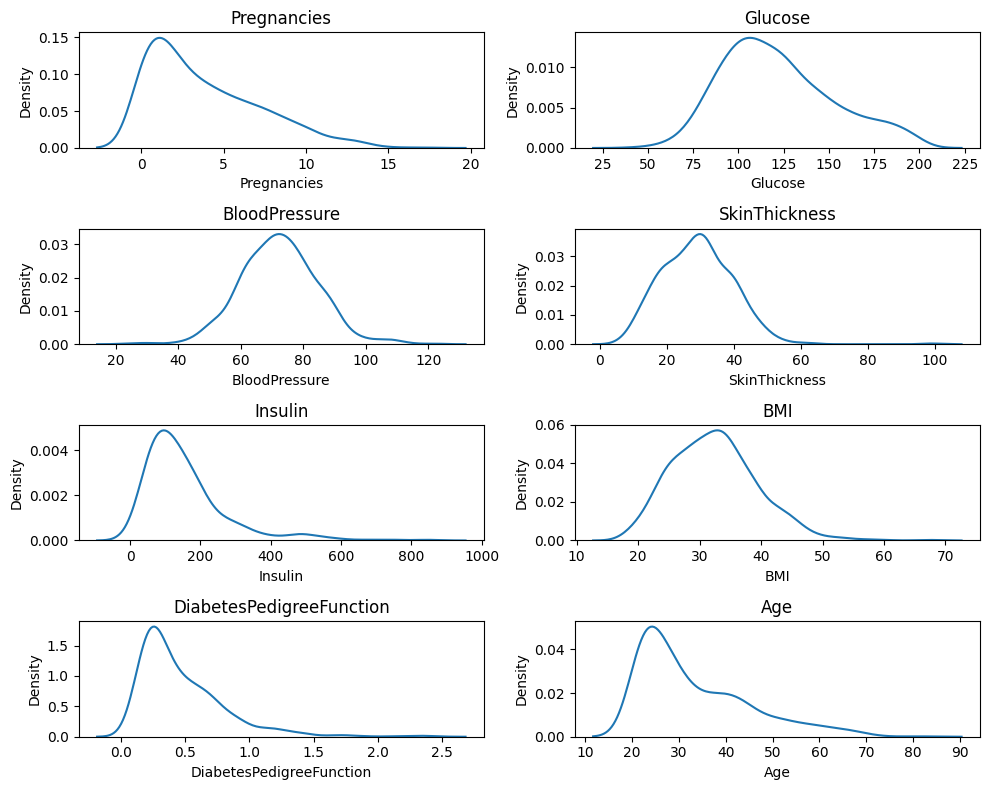

In [29]:
plt.figure(figsize=(10,8))
for i, column in enumerate(columns):
    plt.subplot(4,2,i+1)
    sns.kdeplot(df_copy[column])
    plt.title(column)
plt.tight_layout()
plt.show()
    


we need to replace the NaN values with the respective/suitable measure of central tendency based on the data distribution observed. So plotting the histogram plot of the data

univariate analysis

In [34]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [30]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


In [31]:
df_copy.fillna({'Glucose': df_copy['Glucose'].mean()}, inplace= True)

In [32]:
df_copy['Glucose'].describe()

count    768.000000
mean     121.686763
std       30.435949
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

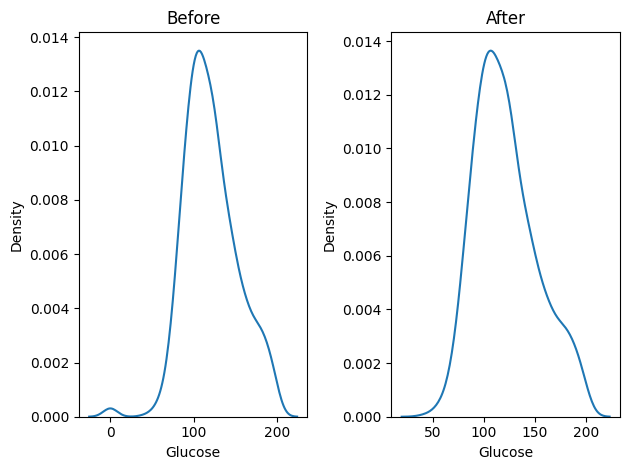

In [33]:
plt.subplot(1,2,1)
sns.kdeplot(df_beforeCleaning['Glucose'])
plt.title("Before")
plt.subplot(1,2,2)
sns.kdeplot(df_copy['Glucose'])
plt.title("After")

plt.tight_layout()

In [34]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [36]:
# df_copy.fillna({'Glucose': df_copy['Glucose'].mean()},inplace= True)
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df_copy.fillna({'BloodPressure': df_copy['BloodPressure'].median()},inplace= True)
df_copy.fillna({'Insulin': df_copy['Insulin'].median()},inplace= True)
df_copy.fillna({'BMI': df_copy['BMI'].median()},inplace= True)
df_copy.fillna({'SkinThickness': df_copy['SkinThickness'].median()},inplace= True)


In [ ]:
df_copy.isnull().sum()

backup copy with NaN

In [ ]:
df_copy2= df_copy.copy(deep= True)

In [ ]:
df_copy2.info()

In [ ]:
hist=df_copy.hist(figsize=(20,20), legend= True)

In [ ]:
import seaborn as sns

In [ ]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(x=df_copy2.dtypes ,data=df_copy2, hue= df_copy2.dtypes, legend= True)
plt.ylabel("count of each data type")
plt.xlabel("data types")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X= df_copy2.drop("Outcome",axis=1)

In [ ]:
y= df_copy2.Outcome

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2,random_state=42, stratify=y)

In [ ]:
model1= LogisticRegression()

In [ ]:
model1.fit(X_train, y_train)

In [ ]:
y_pred= model1.predict(X_test)

In [ ]:
print(y_pred)


model accuracy and scores

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
recall(y_test,y_pred

In [ ]:
(44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64, array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]))

In [ ]:
(44     0
672    0
700    0
630    1
81     0
      ..
32     0
637    0
593    0
425    1
273    0
Name: Outcome, Length: 154, dtype: int64, array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]))

In [ ]:
x=[1,2,3,4,5,6,7,8]

plt.subplot(221)
plt.plot(x)
plt.title("1x1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.subplot(222)
y=[]
for i in x:
    i=i**2
    y.append(i)
plt.plot(y)
plt.title("1x2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.subplot(223)
plt.plot(y)
plt.title("2x1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.subplot(224)
plt.plot(x)
plt.title("2x2")
plt.xlabel("x")
plt.ylabel("f(x)")
